<a href="https://colab.research.google.com/github/RodrigoLarroca/PortFolio/blob/main/Deteccion_fraude_deeplerningtensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Detección de fraude**

Integrantes: Larroca Rodrigo


Acerca del conjunto de datos
Es importante que las compañías de tarjetas de crédito puedan reconocer las transacciones de tarjetas de crédito fraudulentas para que a los clientes no se les cobre por artículos que no compraron.

Acerca de los datos
El conjunto de datos contiene transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares de tarjetas europeos.
Este conjunto de datos presenta transacciones que ocurrieron en dos días, donde tenemos 492 fraudes de 284,807 transacciones. El conjunto de datos está muy desequilibrado, la clase positiva (fraudes) representa el 0,172 % de todas las transacciones.

Contiene solo variables de entrada numéricas que son el resultado de una transformación PCA. Desafortunadamente, debido a problemas de confidencialidad, no podemos proporcionar las funciones originales ni más información general sobre los datos. Las características V1, V2, … V28 son los principales componentes obtenidos con PCA, las únicas características que no han sido transformadas con PCA son 'Tiempo' y 'Cantidad'. La característica 'Tiempo' contiene los segundos transcurridos entre cada transacción y la primera transacción en el conjunto de datos. La función 'Cantidad' es la cantidad de la transacción, esta función se puede utilizar para el aprendizaje sensible a los costos dependiente del ejemplo. Feature 'Class' es la variable de respuesta y toma valor 1 en caso de fraude y 0 en caso contrario.

l contexto comercial de este conjunto de datos es la detección de fraude en transacciones con tarjetas de crédito. Es importante para las compañías de tarjetas de crédito poder reconocer transacciones fraudulentas para evitar que los clientes sean cobrados por artículos que no compraron.

El contexto analítico es el uso de técnicas de aprendizaje automático para detectar patrones en las transacciones que indican fraude. Se utiliza un conjunto de datos que contiene transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares de tarjetas europeos. El conjunto de datos presenta un desequilibrio de clase significativo, con solo el 0,172% de las transacciones siendo fraudulentas. El conjunto de datos solo contiene variables de entrada numéricas que son el resultado de una transformación PCA.

La hipótesis a comprobar es si es posible detectar patrones en las transacciones que indican fraude utilizando técnicas de aprendizaje automático, a pesar del desequilibrio de clase significativo.

CREDITOS:
Elaborado en base al proyecto presentado por 
MARCIN RUTECKI
''Credit card fraud detection - TensorFlow''

Credit Fraud Detection
https://www.kaggle.com/datasets/whenamancodes/fraud-detection

# **Librerias, dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import xgboost as xgb
import imblearn
import statsmodels.formula.api as sm
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns; sns.set()
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score

In [ ]:
cc = data = pd.read_csv('creditcard.csv')
pd.options.display.max_columns = None
cc.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# **Data wrangling**

In [ ]:
cc.info()
cc.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

(284807, 31)

In [ ]:
df = pd.DataFrame(cc)
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Este es un DataFrame de Pandas con 284807 filas y 31 columnas. Las columnas incluyen Hora, V1-V28, Cantidad y Clase. Todas las columnas contienen valores no nulos y son tipos de datos float64 o int64. La columna Clase parece ser una variable de destino y el resto de las columnas son probablemente características.

In [ ]:
df=df.drop(['Time'], axis=1)

La columna time no nos viene al caso.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995
V10,284807.0,2.239053e-15,1.088850,-24.588262,-0.535426,-0.092917,0.453923,23.745136


De estas estadísticas podemos ver que las variables V1 a V28 tienen una media de alrededor de 0 con una desviación estándar de 1. Los valores mínimo y máximo son diferentes para cada columna, pero todos están dentro de rangos razonables.

La columna "Cantidad" tiene una media de 88,35 y una desviación estándar de 250,12. El valor mínimo es 0 y el valor máximo es 25691.16.

La columna "Clase" es la variable de resultado, indica si la transacción es fraudulenta (1) o no (0). La media es 0,0017, lo que significa que solo un porcentaje muy pequeño de las transacciones son fraudulentas.

Además, como se mencionó anteriormente, la media es 0.0017, lo que significa que solo una porción muy pequeña de las transacciones son fraudulentas. Esto es importante tener en cuenta al construir un modelo de detección de fraude, ya que el desequilibrio de clases puede afectar la precisión del modelo. Es posible que sea necesario utilizar técnicas de equilibrio de clases para manejar este desequilibrio y mejorar la precisión del modelo.

# **EDA**

In [ ]:
ac=df.groupby("Class")["Amount"].sum()   

print('Cantidad de transacciones normales:', len(df[df['Class'] == 0]),'en porcentaje:', round(df['Class'].value_counts()[0]/len(df) * 100,2), '%')
print('Cantidad de transacciones fraudulentas:', len(df[df['Class'] == 1]),'en porcentaje:', round(df['Class'].value_counts()[1]/len(df) * 100,2), '%')


print(f"Transacciones fraudulentas en monto:  {ac[1]} millones")
print(f"Transacciones normales en monto:  {ac[0]} millones")

Cantidad de transacciones normales: 284315 en porcentaje: 99.83 %
Cantidad de transacciones fraudulentas: 492 en porcentaje: 0.17 %
Transacciones fraudulentas en monto:  60127.97 millones
Transacciones normales en monto:  25102462.04 millones


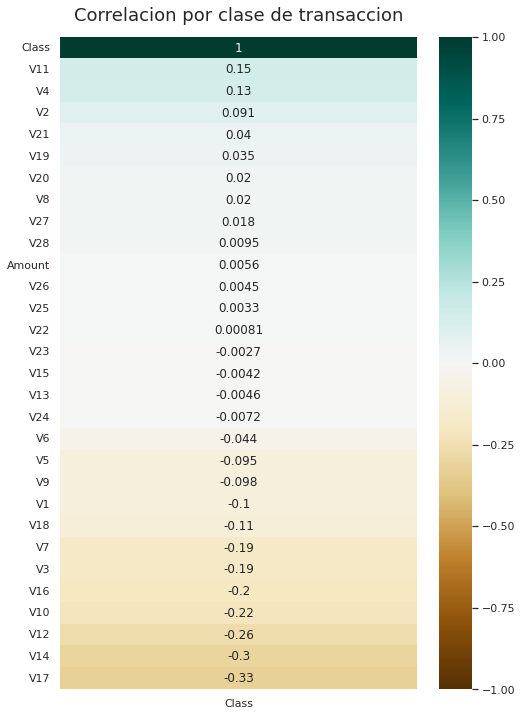

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Class']].sort_values(by='Class', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlacion por clase de transaccion', fontdict={'fontsize':18}, pad=16);

In [ ]:
#para trabajar mas organizado
df_normal = df[df['Class'] == 0]
df_fraude = df[df['Class'] == 1]

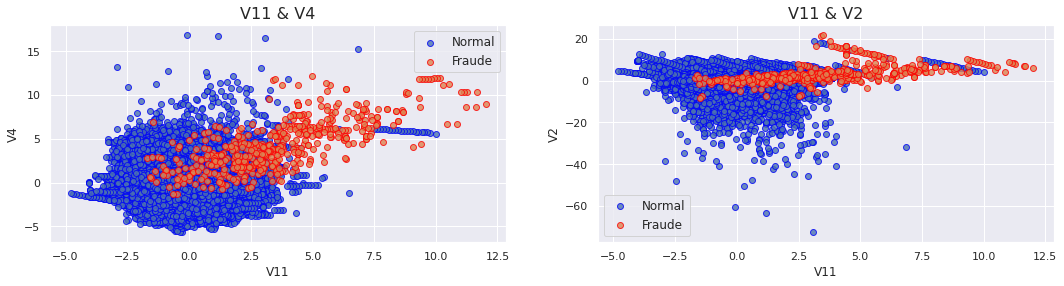

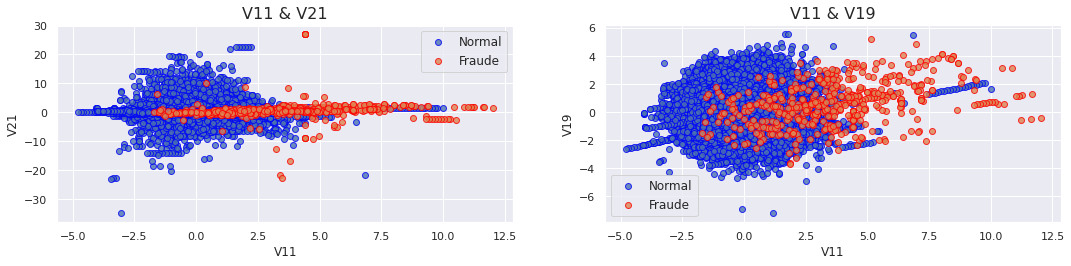

In [ ]:
#V11 & V4
plt.figure(figsize=(18,4))
plt.subplot(121)
plt.scatter(df_normal['V11'], df_normal['V4'], edgecolor='#0104F8', alpha=0.8, label= 'Normal')
plt.scatter(df_fraude['V11'], df_fraude['V4'], edgecolor='#FC0202', alpha=0.8, label= 'Fraude')
plt.legend(loc='best', fontsize=12)
plt.title('V11 & V4', fontsize=16)
plt.ylabel('V4', fontsize=12)
plt.xlabel('V11', fontsize=12)

#V11 & V2
plt.subplot(122)
plt.scatter(df_normal['V11'], df_normal['V2'], edgecolor='#0104F8', alpha=0.8, label= 'Normal')
plt.scatter(df_fraude['V11'], df_fraude['V2'], edgecolor='#FC0202', alpha=0.8, label= 'Fraude')
plt.legend(loc='best', fontsize=12)
plt.title('V11 & V2', fontsize=16)
plt.ylabel('V2', fontsize=12)
plt.xlabel('V11', fontsize=12)

#V11 & V21
plt.figure(figsize=(18,8))
plt.subplot(221)
plt.scatter(df_normal['V11'], df_normal['V21'], edgecolor='#0104F8', alpha=0.8, label= 'Normal')
plt.scatter(df_fraude['V11'], df_fraude['V21'], edgecolor='#FC0202', alpha=0.8, label= 'Fraude')
plt.legend(loc='best', fontsize=12)
plt.title('V11 & V21', fontsize=16)
plt.ylabel('V21', fontsize=12)
plt.xlabel('V11', fontsize=12)

#V11 & V19
plt.subplot(222)
plt.scatter(df_normal['V11'], df_normal['V19'], edgecolor='#0104F8', alpha=0.8, label= 'Normal')
plt.scatter(df_fraude['V11'], df_fraude['V19'], edgecolor='#FC0202', alpha=0.8, label= 'Fraude')
plt.legend(loc='best', fontsize=12)
plt.title('V11 & V19', fontsize=16)
plt.ylabel('V19', fontsize=12)
plt.xlabel('V11', fontsize=12)
plt.show()

En general los casos de fraude estan en los outliers

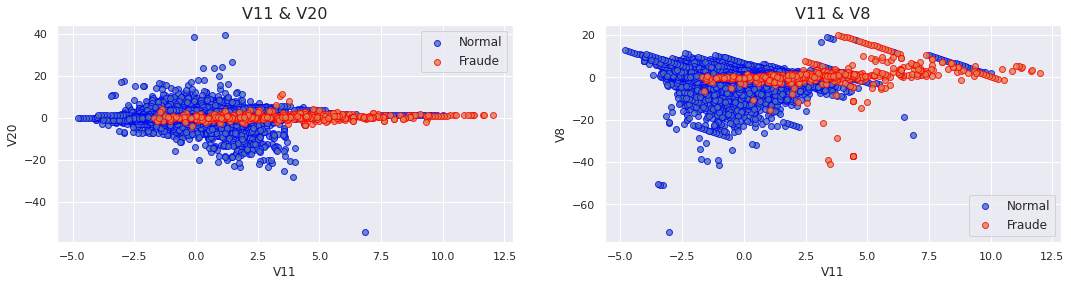

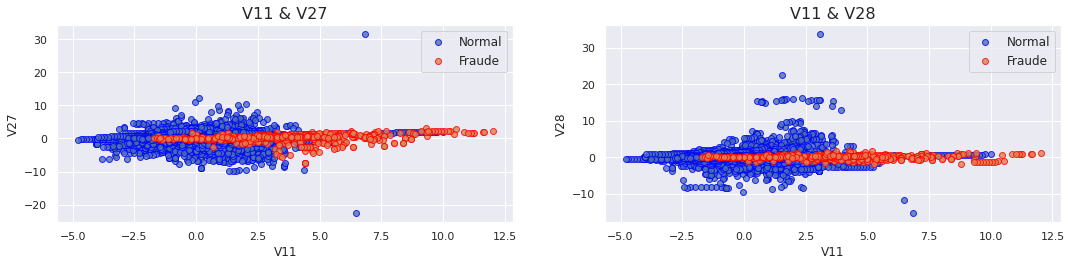

In [ ]:
#V11 & V20
plt.figure(figsize=(18,4))
plt.subplot(121)
plt.scatter(df_normal['V11'], df_normal['V20'], edgecolor='#0104F8', alpha=0.8, label= 'Normal')
plt.scatter(df_fraude['V11'], df_fraude['V20'], edgecolor='#FC0202', alpha=0.8, label= 'Fraude')
plt.legend(loc='best', fontsize=12)
plt.title('V11 & V20', fontsize=16)
plt.ylabel('V20', fontsize=12)
plt.xlabel('V11', fontsize=12)

#V11 & V8
plt.subplot(122)
plt.scatter(df_normal['V11'], df_normal['V8'], edgecolor='#0104F8', alpha=0.8, label= 'Normal')
plt.scatter(df_fraude['V11'], df_fraude['V8'], edgecolor='#FC0202', alpha=0.8, label= 'Fraude')
plt.legend(loc='best', fontsize=12)
plt.title('V11 & V8', fontsize=16)
plt.ylabel('V8', fontsize=12)
plt.xlabel('V11', fontsize=12)

#V11 & V27
plt.figure(figsize=(18,8))
plt.subplot(221)
plt.scatter(df_normal['V11'], df_normal['V27'], edgecolor='#0104F8', alpha=0.8, label= 'Normal')
plt.scatter(df_fraude['V11'], df_fraude['V27'], edgecolor='#FC0202', alpha=0.8, label= 'Fraude')
plt.legend(loc='best', fontsize=12)
plt.title('V11 & V27', fontsize=16)
plt.ylabel('V27', fontsize=12)
plt.xlabel('V11', fontsize=12)

#V11 & V28
plt.subplot(222)
plt.scatter(df_normal['V11'], df_normal['V28'], edgecolor='#0104F8', alpha=0.8, label= 'Normal')
plt.scatter(df_fraude['V11'], df_fraude['V28'], edgecolor='#FC0202', alpha=0.8, label= 'Fraude')
plt.legend(loc='best', fontsize=12)
plt.title('V11 & V28', fontsize=16)
plt.ylabel('V28', fontsize=12)
plt.xlabel('V11', fontsize=12)
plt.show()

En general los casos de fraude estan en los outliers. Es muy curioso la linea recta en fraudes con valores 0 o cercanos a 0, pero con maximos en V11


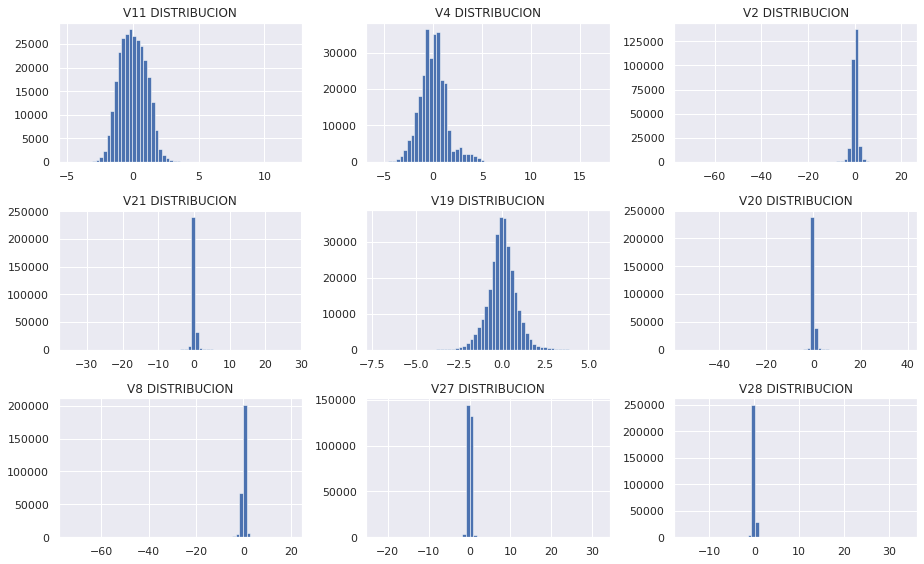

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(13,8))

axes[0,0].hist(df['V11'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("V11 DISTRIBUCION");

axes[0,1].hist(df['V4'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("V4 DISTRIBUCION");

axes[0,2].hist(df['V2'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title("V2 DISTRIBUCION");

axes[1,0].hist(df['V21'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("V21 DISTRIBUCION");

axes[1,1].hist(df['V19'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("V19 DISTRIBUCION");

axes[1,2].hist(df['V20'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].set_title("V20 DISTRIBUCION");

axes[2,0].hist(df['V8'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,0].set_title("V8 DISTRIBUCION");

axes[2,1].hist(df['V27'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,1].set_title("V27 DISTRIBUCION");

axes[2,2].hist(df['V28'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,2].set_title("V28 DISTRIBUCION");

plt.tight_layout()

Se ven distribuciones 'raras' se analizara sin outliers

# **Outliers, preparando el modelo**

IQR es otro método sólido para etiquetar los valores atípicos. El método IQR (rango intercuartílico) de la detección de valores atípicos fue desarrollado por John Tukey, pionero del análisis de datos de exploración.

In [ ]:
def detect_outliers(df,n,features):

  outlier_indices = []
  for col in features:
      #25%
      Q1 = np.percentile(df[col], 25)
      #75%
      Q3 = np.percentile(df[col],75)
      #IQR
      IQR = Q3 - Q1
      outlier_step = 1.5 * IQR
      outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
      outlier_indices.extend(outlier_list_col)
        
    #observaciones con más de 2 valores atípicos
  outlier_indices = Counter(outlier_indices)        
  multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
  return multiple_outliers   
      #Outliers
Outliers_IQR = detect_outliers(df,2,['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])
      #Drop outliers
df_out = df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

In [ ]:
print ('Cantidad de fraudes antes de descartar valores atípicos: ', len(df[df['Class'] == 0]),'en porcentaje:', round(df['Class'].value_counts()[0]/len(df) * 100,2), '%')
print ('Cantidad de fraudes después de descartar valores atípicos: ', len(df_out[df_out['Class'] == 0]),'en porcentaje:', round(df_out['Class'].value_counts()[0]/len(df) * 100,2), '%')
print('Porcentaje de datos quitados en transacciones normales:', round((1-(237648/284315))*100,2), '%')

Cantidad de fraudes antes de descartar valores atípicos:  284315 en porcentaje: 99.83 %
Cantidad de fraudes después de descartar valores atípicos:  237648 en porcentaje: 83.44 %
Porcentaje de datos quitados en transacciones normales: 16.41 %


In [ ]:
print ('Cantidad de fraudes antes de descartar valores atípicos: ', len(df[df['Class'] == 1]),'en porcentaje:', round(df['Class'].value_counts()[1]/len(df) * 100,2), '%')
print ('Cantidad de fraudes después de descartar valores atípicos: ', len(df_out[df_out['Class'] == 1]),'en porcentaje:', round(df_out['Class'].value_counts()[1]/len(df) * 100,2), '%')
print('Porcentaje de datos quitados en transacciones fraudulentas:', round((1-(43/492))*100,2), '%')

Cantidad de fraudes antes de descartar valores atípicos:  492 en porcentaje: 0.17 %
Cantidad de fraudes después de descartar valores atípicos:  43 en porcentaje: 0.02 %
Porcentaje de datos quitados en transacciones fraudulentas: 91.26 %


**Me parece una cantidad muy elevada de datos fraudulentos quitados, siendo que en las graficas se ve que en estos valores atipicos es donde se encuentra en si los fraudes.** AUN ASI se analizara en el modelo los outliers en particular.

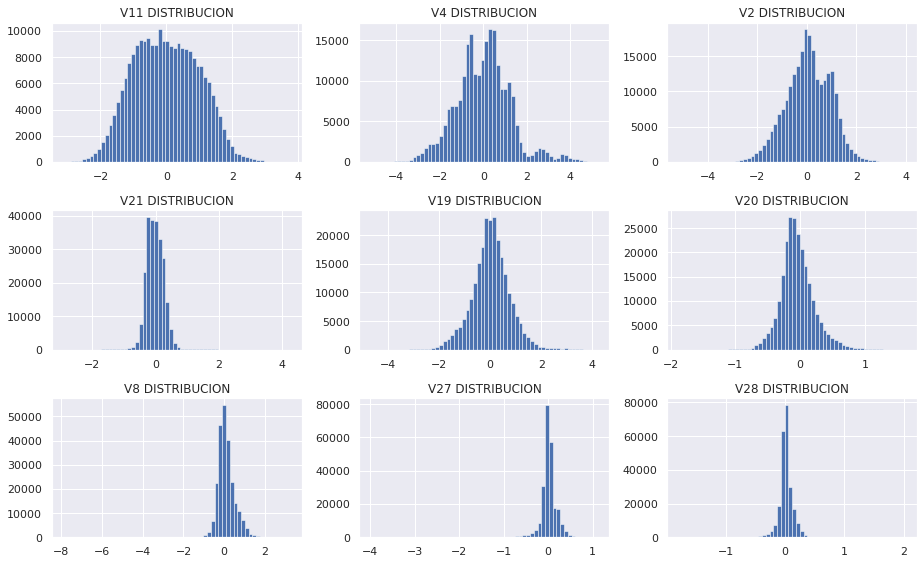

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(13,8))

axes[0,0].hist(df_out['V11'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("V11 DISTRIBUCION");

axes[0,1].hist(df_out['V4'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("V4 DISTRIBUCION");

axes[0,2].hist(df_out['V2'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title("V2 DISTRIBUCION");

axes[1,0].hist(df_out['V21'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("V21 DISTRIBUCION");

axes[1,1].hist(df_out['V19'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("V19 DISTRIBUCION");

axes[1,2].hist(df_out['V20'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].set_title("V20 DISTRIBUCION");

axes[2,0].hist(df_out['V8'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,0].set_title("V8 DISTRIBUCION");

axes[2,1].hist(df_out['V27'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,1].set_title("V27 DISTRIBUCION");

axes[2,2].hist(df_out['V28'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,2].set_title("V28 DISTRIBUCION");

plt.tight_layout()

Se ve una distribucion mas 'normal' ahora si.

Un antes y despues de los outleirs 

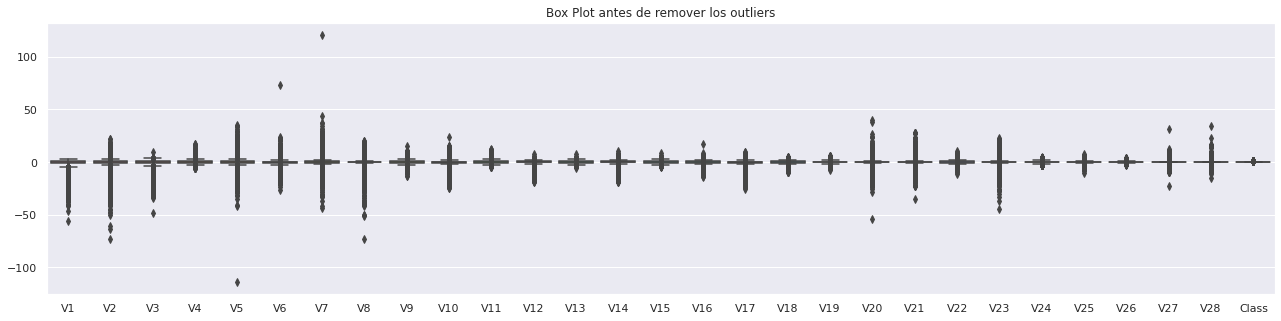

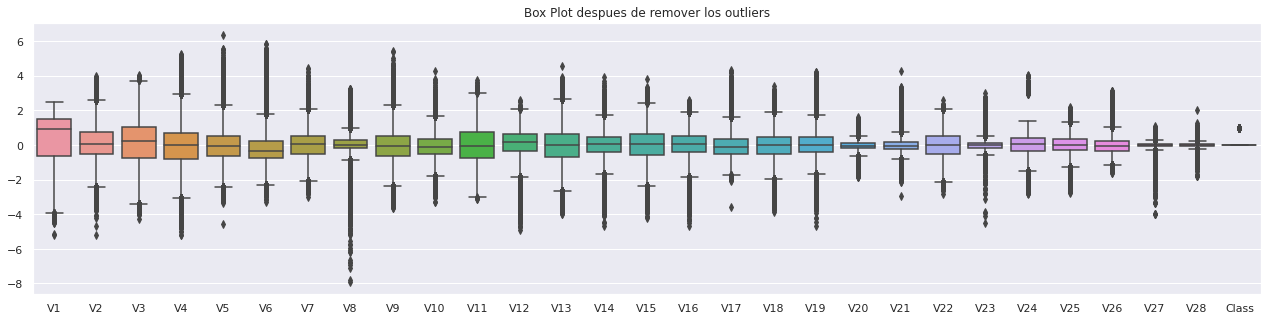

In [ ]:
df_no_amount = df.drop(columns=['Amount'])
df_no_amount_out = df_out.drop(columns=['Amount'])

plt.figure(figsize=(22,5))
sns.boxplot(data=df_no_amount)
plt.title("Box Plot antes de remover los outliers")
plt.show()
plt.figure(figsize=(22,5))
sns.boxplot(data=df_no_amount_out)
plt.title("Box Plot despues de remover los outliers")
plt.show()

Repito, datos mas normales si se quiere.

Mismo analisis pero para amount, separado por problema con rangos de ejes.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


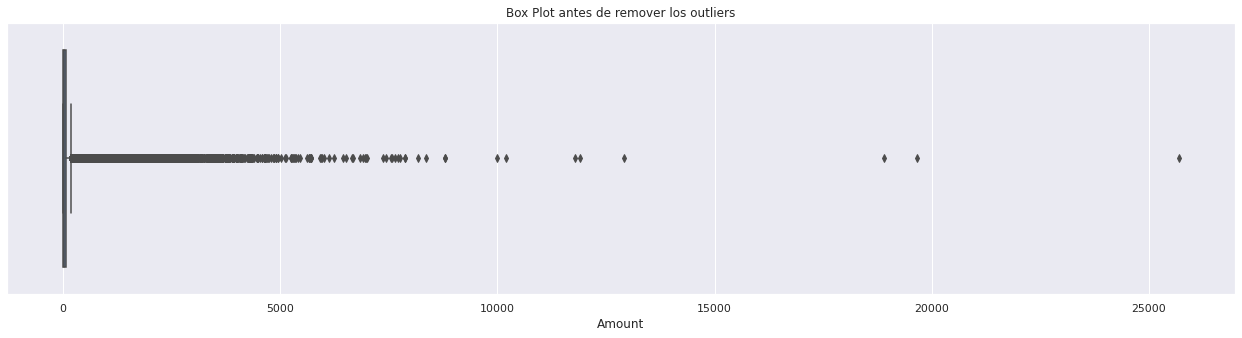

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


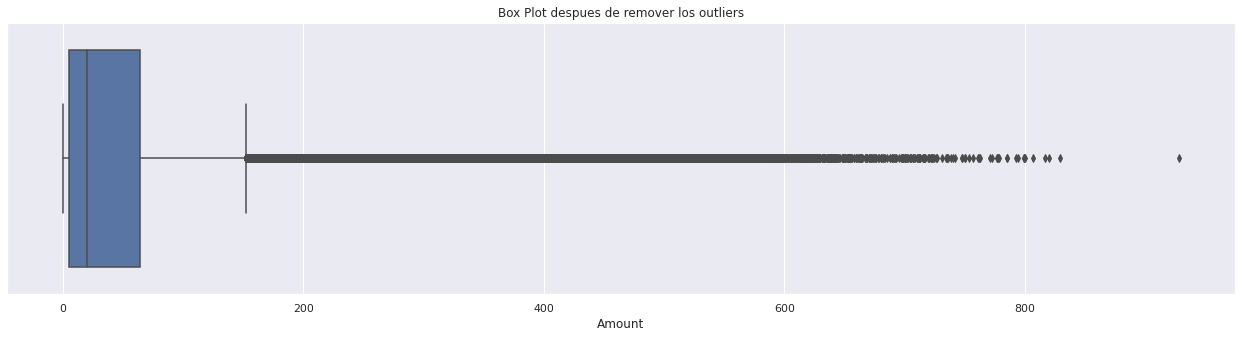

In [ ]:
plt.figure(figsize=(22,5))
sns.boxplot(df['Amount'])
plt.title("Box Plot antes de remover los outliers")
plt.show()
plt.figure(figsize=(22,5))
sns.boxplot(df_out['Amount'])
plt.title("Box Plot despues de remover los outliers")
plt.show()

In [ ]:
#outliers en df
df_out1 = df.loc[df.index[Outliers_IQR]]

Igualmente el analisis de prediccion se realizara sin los outliers y solamente con outliers.

# **Modelo solo outliers**

In [ ]:
# Train/Test split
X = df_out1.drop('Class',axis=1).values
y = df_out1['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)


Este código está dividiendo un conjunto de datos en dos partes, una para entrenar un modelo y otra para evaluar el rendimiento del modelo.

La primera línea está tomando un conjunto de datos llamado df_out1 y eliminando la columna "Class" de ese conjunto de datos. El resultado se almacena en una variable llamada X.

La segunda línea está tomando solo la columna "Class" del conjunto de datos df_out1 y almacenando esos valores en una variable llamada y.

La tercera línea está utilizando la función train_test_split de scikit-learn para dividir el conjunto de datos en dos partes: una para entrenar el modelo (X_train, y_train) y otra para evaluar el rendimiento del modelo (X_test, y_test). El parámetro test_size establece el tamaño de la muestra de prueba en un 25% y el parámetro random_state asegura que siempre se seleccionen las mismas muestras para entrenamiento y prueba.

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

Este código está normalizando los datos en el conjunto de entrenamiento (X_train) utilizando la clase MinMaxScaler de scikit-learn.

La primera línea crea un objeto escalador MinMaxScaler.

La segunda línea ajusta el escalador MinMaxScaler al conjunto de entrenamiento (X_train). La función fit() se utiliza para ajustar el escalador al conjunto de entrenamiento, calculando los valores mínimos y máximos para cada característica.

Luego de esto, se podra aplicar el metodo "transform" para escalar los datos y poder trabajar con ellos con mas facilidad.

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape

(35337, 29)

Este código está escalando los datos en el conjunto de entrenamiento (X_train) y el conjunto de prueba (X_test) utilizando el escalador MinMaxScaler previamente ajustado.

La primera línea está utilizando el método transform() del objeto escalador MinMaxScaler para escalar los datos en el conjunto de entrenamiento (X_train). El método transform() aplica la normalización MinMax a los datos utilizando los valores mínimos y máximos calculados durante el ajuste.

La segunda línea está escalando los datos en el conjunto de prueba (X_test) de la misma manera que el conjunto de entrenamiento.

La tercera línea está obteniendo la forma del conjunto de entrenamiento escalado (X_train) y devuelve una tupla con el número de filas y el número de columnas.

**¿Cómo elegir el número de capas y nodos ocultos en una red neuronal feedforward?**

Me doy cuenta de que esta pregunta ha sido respondida, pero no creo que la respuesta existente realmente aborde la pregunta más allá de señalar un enlace generalmente relacionado con el tema de la pregunta. En particular, el enlace describe una técnica para la configuración de redes programáticas, pero no es un método estándar y aceptado para la configuración de redes.

Siguiendo un pequeño conjunto de reglas claras, se puede establecer mediante programación una arquitectura de red competente (es decir, el número y tipo de capas neuronales y el número de neuronas que comprende cada capa). Seguir este esquema le dará una arquitectura competente, pero probablemente no óptima.

Pero una vez que se inicializa esta red, puede ajustar iterativamente la configuración durante el entrenamiento utilizando una serie de algoritmos auxiliares; una familia de estos trabajos mediante la poda de nodos basados ​​en valores (pequeños) del vector de peso después de un cierto número de épocas de entrenamiento; en otras palabras, eliminando nodos innecesarios/redundantes (más sobre esto a continuación).

Entonces, cada NN tiene tres tipos de capas: entrada , oculta y salida .
Crear la arquitectura NN, por lo tanto, significa generar valores para la cantidad de capas de cada tipo y la cantidad de nodos en cada una de estas capas.


**La capa de entrada**
Simple: cada NN tiene exactamente uno de ellos, sin excepciones que yo sepa.
Con respecto a la cantidad de neuronas que componen esta capa, este parámetro se determina de manera completa y única una vez que conoce la forma de sus datos de entrenamiento. Específicamente, la cantidad de neuronas que componen esa capa es igual a la cantidad de características (columnas) en sus datos . Algunas configuraciones de NN agregan un nodo adicional para un término de sesgo.

**La capa de salida**
Al igual que la capa de entrada, cada NN tiene exactamente una capa de salida. Determinar su tamaño (número de neuronas) es sencillo; está completamente determinado por la configuración del modelo elegido.
¿Su NN se ejecutará en modo de máquina o en modo de regresión (la convención de ML de usar un término que también se usa en estadísticas pero asignarle un significado diferente es muy confuso)? Modo máquina: devuelve una etiqueta de clase (p. ej., "Cuenta Premium"/"Cuenta básica"). El modo de regresión devuelve un valor (p. ej., precio).

Si el NN es un regresor, entonces la capa de salida tiene un solo nodo.

Si el NN es un clasificador, también tiene un solo nodo a menos que se use softmax , en cuyo caso la capa de salida tiene un nodo por etiqueta de clase en su modelo.

**Las capas ocultas**
Esas pocas reglas establecen el número de capas y el tamaño (neuronas/capa) para las capas de entrada y salida. Eso deja las capas ocultas.

¿Cuántas capas ocultas? Bueno, si sus datos son linealmente separables (lo que a menudo sabe cuando comienza a codificar un NN), entonces no necesita ninguna capa oculta. Por supuesto, tampoco necesita un NN para resolver sus datos, pero aún así hará el trabajo.

Más allá de eso, como probablemente sepa, hay una montaña de comentarios sobre la cuestión de la configuración de capas ocultas en las NN (consulte las preguntas frecuentes sobre NN increíblemente completas y perspicaces para obtener un excelente resumen de ese comentario). Un tema dentro de este tema en el que hay consenso es la diferencia de rendimiento al añadir capas ocultas adicionales: las situaciones en las que el rendimiento mejora con una segunda (o tercera, etc.) capa oculta son muy pocas. Una capa oculta es suficiente para la gran mayoría de los problemas.

Entonces, ¿qué pasa con el tamaño de la(s) capa(s) oculta(s)? ¿Cuántas neuronas? Hay algunas reglas generales derivadas empíricamente; de estos, el más comúnmente utilizado es " el tamaño óptimo de la capa oculta suele estar entre el tamaño de la entrada y el tamaño de las capas de salida ". Jeff Heaton, autor de Introducción a las redes neuronales en Java , ofrece algunas más.

En resumen, para la mayoría de los problemas, probablemente se podría obtener un rendimiento decente (incluso sin un segundo paso de optimización) estableciendo la configuración de capas ocultas usando solo dos reglas: (i) el número de capas ocultas es igual a uno; y (ii) el número de neuronas en esa capa es la media de las neuronas en las capas de entrada y salida.

**Optimización de la Configuración de la Red**
Poda describe un conjunto de técnicas para recortar el tamaño de la red (por nodos, no por capas) para mejorar el rendimiento computacional y, a veces, el rendimiento de la resolución. La esencia de estas técnicas es eliminar nodos de la red durante el entrenamiento mediante la identificación de aquellos nodos que, si se eliminaran de la red, no afectarían notablemente el rendimiento de la red (es decir, la resolución de los datos). (Incluso sin usar una técnica de poda formal, puede tener una idea aproximada de qué nodos no son importantes mirando su matriz de peso después del entrenamiento; mire los pesos muy cercanos a cero: son los nodos en cada extremo de esos pesos los que son a menudo se eliminan durante la poda). Obviamente, si usa un algoritmo de poda durante el entrenamiento, comience con una configuración de red que tenga más probabilidades de tener nodos en exceso (es decir, 'podables').

Dicho de otra manera, al aplicar un algoritmo de poda a su red durante el entrenamiento, puede acercarse a la configuración de red óptima; si puede hacer eso en un solo "por adelantado" (como un algoritmo basado en un algoritmo genético), no lo sé, aunque sé que por ahora, esta optimización de dos pasos es más común.

In [ ]:
model = Sequential()

model.add(Dense(units=29,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=14,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(units=7,activation='relu'))


model.add(Dense(units=2,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

Este código está construyendo una red neuronal de varias capas utilizando la librería Keras.

La primera línea está creando un objeto Sequential, que es el tipo de modelo que se utiliza para construir una red neuronal secuencial.

La siguientes lineas se están agregando capas a la red neuronal utilizando el método add().

La primera capa es una capa densa con 29 unidades y una función de activación relu.

La siguiente capa es una capa de Dropout con una tasa de 0.3.

La siguiente capa es una capa densa con 14 unidades y una función de activación relu.

La siguiente capa es una capa de Dropout con una tasa de 0.1.

La siguiente capa es una capa densa con 7 unidades y una función de activación relu.

La siguiente capa es una capa densa con 2 unidades y una función de activación relu.

La última capa es una capa densa con 1 unidad y una función de activación sigmoid.

La última línea está compilando el modelo utilizando la función de pérdida binary_crossentropy para un problema de clasificación binaria y el optimizador Adam para actualizar los pesos de la red neuronal durante el entrenamiento.

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=35)

Este código está configurando una parada temprana en el entrenamiento del modelo.

La clase EarlyStopping de Keras se utiliza para detener el entrenamiento de un modelo una vez que deja de mejorar en un conjunto de datos de validación.

La primera línea está creando un objeto EarlyStopping con los siguientes parámetros:
monitor: La métrica a monitorear. En este caso, se está monitoreando la función de pérdida en el conjunto de validación ('val_loss').
mode: El sentido de mejora. En este caso, se está buscando una minimización de la pérdida ('min').
verbose: Nivel de verbosidad. El valor 2 indica que se imprimirán mensajes cuando se detenga el entrenamiento.
patience: Número de épocas a esperar antes de detener el entrenamiento si no se ve mejora en la métrica monitor.
Luego de esto, se podra pasar este objeto como un parametro en el metodo "fit" del modelo para detener el entrenamiento una vez que se cumpla la condicion de parada temprana.

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=3000,
          validation_data=(X_test, y_test), verbose=2,
          callbacks=[early_stop]
          )

Epoch 1/3000
1105/1105 - 4s - loss: 0.0788 - val_loss: 0.0336 - 4s/epoch - 3ms/step
Epoch 2/3000
1105/1105 - 2s - loss: 0.0277 - val_loss: 0.0149 - 2s/epoch - 2ms/step
Epoch 3/3000
1105/1105 - 3s - loss: 0.0187 - val_loss: 0.0129 - 3s/epoch - 2ms/step
Epoch 4/3000
1105/1105 - 2s - loss: 0.0160 - val_loss: 0.0125 - 2s/epoch - 2ms/step
Epoch 5/3000
1105/1105 - 2s - loss: 0.0147 - val_loss: 0.0126 - 2s/epoch - 2ms/step
Epoch 6/3000
1105/1105 - 2s - loss: 0.0144 - val_loss: 0.0114 - 2s/epoch - 2ms/step
Epoch 7/3000
1105/1105 - 2s - loss: 0.0141 - val_loss: 0.0113 - 2s/epoch - 2ms/step
Epoch 8/3000
1105/1105 - 2s - loss: 0.0138 - val_loss: 0.0146 - 2s/epoch - 2ms/step
Epoch 9/3000
1105/1105 - 2s - loss: 0.0140 - val_loss: 0.0123 - 2s/epoch - 2ms/step
Epoch 10/3000
1105/1105 - 3s - loss: 0.0141 - val_loss: 0.0112 - 3s/epoch - 2ms/step
Epoch 11/3000
1105/1105 - 2s - loss: 0.0135 - val_loss: 0.0119 - 2s/epoch - 2ms/step
Epoch 12/3000
1105/1105 - 2s - loss: 0.0134 - val_loss: 0.0122 - 2s/epoch 

Este código está entrenando el modelo de red neuronal construido anteriormente en el conjunto de entrenamiento (X_train, y_train) y evaluando su rendimiento en el conjunto de prueba (X_test, y_test) utilizando el objeto EarlyStopping previamente configurado.

La primera línea está utilizando el método fit() del modelo para entrenarlo en el conjunto de entrenamiento. Los parámetros incluyen:
x: los datos de entrada (X_train).
y: los datos de salida esperados (y_train).
epochs: el número de iteraciones sobre el conjunto de entrenamiento.
validation_data: el conjunto de datos de validación (X_test, y_test) para evaluar el rendimiento del modelo.
verbose: nivel de verbosidad (2 indica que se imprimirá el progreso del entrenamiento).
callbacks: lista de llamadas a ejecutar durante el entrenamiento. En este caso, se está pasando el objeto EarlyStopping para detener el entrenamiento si se cumple la condición de parada temprana.

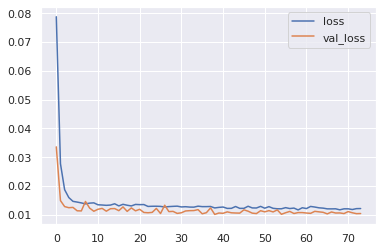

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

Este código está graficando la función de pérdida del modelo durante el entrenamiento.

La primera línea está creando un DataFrame de la historia del entrenamiento del modelo, que contiene los valores de la función de pérdida y la precisión para cada époch.

La segunda línea está utilizando el método plot() del DataFrame para graficar los valores de la función de pérdida. La función de pérdida se grafica en función del número de époch, lo que permite ver cómo se comporta la función de pérdida durante el entrenamiento. Esto puede ser útil para identificar si el modelo está sufriendo de sobreajuste o subajuste.

In [ ]:
predictions = (model.predict(X_test) > 0.5)*1

369/369 [==============================] - 1s 1ms/step


Este código está utilizando el modelo entrenado para hacer predicciones sobre el conjunto de prueba (X_test).

La primera línea está utilizando el método predict() del modelo para hacer predicciones sobre el conjunto de prueba (X_test). Este método devuelve una matriz de probabilidades para cada ejemplo en el conjunto de prueba, donde cada valor entre 0 y 1 representa la probabilidad de que el ejemplo pertenezca a la clase positiva.

La segunda línea está utilizando una operación booleana para convertir las probabilidades a predicciones de clase binaria (0 o 1). El valor de cada probabilidad se compara con 0.5, y si es mayor a 0.5 se asigna 1, en caso contrario se asigna 0.

Esto es útil para transformar las salidas del modelo a un formato mas facil de interpretar y comparar con los datos de prueba reales.

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11668
           1       0.82      0.88      0.85       111

    accuracy                           1.00     11779
   macro avg       0.91      0.94      0.93     11779
weighted avg       1.00      1.00      1.00     11779



Este código está imprimiendo un informe de clasificación que resume las métricas de rendimiento del modelo para el conjunto de prueba.

La función classification_report() de scikit-learn se utiliza para generar un informe de clasificación que incluye varias métricas de rendimiento. Estas métricas incluyen precisión, recall, f1-score y soporte.

La primera línea está utilizando la función classification_report() de scikit-learn para generar un informe de clasificación. Los parámetros incluyen:
y_test: las etiquetas verdaderas para el conjunto de prueba.
predictions: las predicciones del modelo para el conjunto de prueba.
Una vez ejecutado, se imprimirá un resumen de las métricas de rendimiento del modelo, como la precisión, recall, f1-score y soporte para cada clase. Esto puede ayudar a evaluar el rendimiento del modelo y a identificar cualquier problema de desempeño.



In [ ]:
print(confusion_matrix(y_test,predictions))

[[11647    21]
 [   13    98]]


In [ ]:
cm_df = pd.DataFrame(confusion_matrix(y_test,predictions))
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,11647,21
Actual 1,13,98


La función confusion_matrix() de scikit-learn se utiliza para generar una matriz de confusión que resume el rendimiento del modelo en términos de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

La primera línea está utilizando la función confusion_matrix() de scikit-learn para generar una matriz de confusión. Los parámetros incluyen:
y_test: las etiquetas verdaderas para el conjunto de prueba.
predictions: las predicciones del modelo para el conjunto de prueba.
Una vez ejecutado, se imprimirá una matriz de confusión que contiene las siguientes cuatro métricas:

*   Verdaderos Positivos (TP): El número de ejemplos que son positivos y son   clasificados correctamente como positivos.
*   Verdaderos Negativos (TN): El número de ejemplos que son negativos y son clasificados correctamente como negativos.
*   Falsos Positivos (FP): El número de ejemplos que son negativos pero clasificados como positivos.
*   Falsos Negativos (FN): El número de ejemplos que son negativos pero clasificados como positivos.





In [ ]:
f1 = f1_score(y_test, predictions)
print (f1)

0.8521739130434782


Este código está calculando el puntaje F1 para el conjunto de prueba y las predicciones del modelo.

La función f1_score() de scikit-learn se utiliza para calcular el puntaje F1. El puntaje F1 es la media armónica entre la precisión y el recall, y es una métrica común para evaluar modelos de clasificación en conjuntos de datos desequilibrados.

La primera línea está utilizando la función f1_score() de scikit-learn para calcular el puntaje F1. Los parámetros incluyen:
y_test: las etiquetas verdaderas para el conjunto de prueba.
predictions: las predicciones del modelo para el conjunto de prueba.
La segunda línea está imprimiendo el puntaje F1 calculado. El puntaje F1 es un número entre 0 y 1, donde un puntaje cercano a 1 indica un alto desempeño en términos de precisión y recall, y un puntaje cercano a 0 indica un bajo desempeño.

In [ ]:
CM = confusion_matrix(y_test,predictions)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

Este código está calculando los valores de verdaderos positivos (TP), verdaderos negativos (TN), falsos positivos (FP) y falsos negativos (FN) a partir de la matriz de confusión generada anteriormente.

In [ ]:
# Sensibilidad, tasa de aciertos, recuperación o tasa de verdaderos positivos
TPR = TP/(TP+FN)
# Especificidad o tasa negativa verdadera
TNR = TN/(TN+FP) 
# Precisión o valor predictivo positivo
PPV = TP/(TP+FP)
# Valor predictivo negativo
NPV = TN/(TN+FN)
# Fall out o tasa de falsos positivos
FPR = FP/(FP+TN)
# Tasa de falsos negativos
FNR = FN/(TP+FN)
# Tasa de descubrimiento falso
FDR = FP/(TP+FP)

# Precisión general
ACC = (TP+TN)/(TP+FP+FN+TN)

Este código está calculando varias métricas de rendimiento para el modelo de clasificación.

TPR (True Positive Rate) o sensibilidad: es la fracción de verdaderos positivos (ejemplos que son verdaderamente de la clase positiva y que son clasificados correctamente como tal) entre el número total de verdaderos positivos.
TNR (True Negative Rate) o especificidad: es la fracción de verdaderos negativos (ejemplos que son verdaderamente de la clase negativa y que son clasificados correctamente como tal) entre el número total de verdaderos negativos.
PPV (Positive Predictive Value) o precisión: es la fracción de verdaderos positivos entre el número total de ejemplos clasificados como positivos.
NPV (Valor predictivo negativo): es la fracción de verdaderos negativos entre el número total de ejemplos clasificados como negativos.
FPR (False Positive Rate) o falla en clasificar como negativo: es la fracción de falsos positivos (ejemplos que son verdaderamente negativos pero que son clasificados como positivos) entre el número total de verdaderos negativos.
FNR (False Negative Rate) o falla en clasificar como positivo: es la fracción de falsos negativos (ejemplos que son verdaderamente positivos pero que son clasificados como negativos) entre el número total de verdaderos positivos.
FDR (False Discovery Rate): es la fracción de falsos positivos entre el número total de ejemplos clasificados como positivos.
ACC (Exactitud) o precisión global: es el número de ejemplos clasificados correctamente entre el número total de ejemplos

In [ ]:
ACC

0.997113507088887

# Modelo sin **outliers**

In [ ]:
X = df_out.drop('Class',axis=1).values
y = df_out['Class'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape

(178268, 29)

In [ ]:
model = Sequential()

model.add(Dense(units=29,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=14,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(units=7,activation='relu'))
#model.add(Dropout(0.1))

model.add(Dense(units=2,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

# Para un problema de clasificación binaria
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=35)

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=3000,
          validation_data=(X_test, y_test), verbose=2,
          callbacks=[early_stop]
          )

Epoch 1/3000
5571/5571 - 13s - loss: 0.0054 - val_loss: 0.0025 - 13s/epoch - 2ms/step
Epoch 2/3000
5571/5571 - 13s - loss: 0.0018 - val_loss: 0.0030 - 13s/epoch - 2ms/step
Epoch 3/3000
5571/5571 - 12s - loss: 0.0018 - val_loss: 0.0030 - 12s/epoch - 2ms/step
Epoch 4/3000
5571/5571 - 13s - loss: 0.0019 - val_loss: 0.0026 - 13s/epoch - 2ms/step
Epoch 5/3000
5571/5571 - 13s - loss: 0.0017 - val_loss: 0.0029 - 13s/epoch - 2ms/step
Epoch 6/3000
5571/5571 - 12s - loss: 0.0017 - val_loss: 0.0025 - 12s/epoch - 2ms/step
Epoch 7/3000
5571/5571 - 12s - loss: 0.0018 - val_loss: 0.0027 - 12s/epoch - 2ms/step
Epoch 8/3000
5571/5571 - 12s - loss: 0.0019 - val_loss: 0.0031 - 12s/epoch - 2ms/step
Epoch 9/3000
5571/5571 - 12s - loss: 0.0018 - val_loss: 0.0026 - 12s/epoch - 2ms/step
Epoch 10/3000
5571/5571 - 12s - loss: 0.0017 - val_loss: 0.0034 - 12s/epoch - 2ms/step
Epoch 11/3000
5571/5571 - 13s - loss: 0.0016 - val_loss: 0.0032 - 13s/epoch - 2ms/step
Epoch 12/3000
5571/5571 - 12s - loss: 0.0016 - val_l

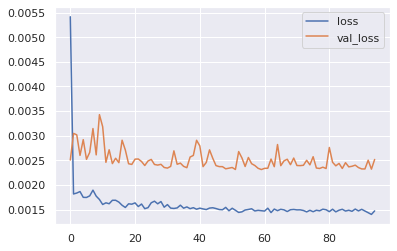

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
predictions_2nd = (model.predict(X_test) > 0.5)*1

1857/1857 [==============================] - 3s 2ms/step


In [ ]:
print(classification_report(y_test,predictions_2nd))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59407
           1       0.00      0.00      0.00        16

    accuracy                           1.00     59423
   macro avg       0.50      0.50      0.50     59423
weighted avg       1.00      1.00      1.00     59423



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(confusion_matrix(y_test,predictions_2nd))

[[59407     0]
 [   16     0]]


In [ ]:
cm_df = pd.DataFrame(confusion_matrix(y_test,predictions_2nd))
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,59407,0
Actual 1,16,0


In [ ]:
CM = confusion_matrix(y_test,predictions_2nd)

In [ ]:
TN_2nd = CM[0][0]
FN_2nd = CM[1][0]
TP_2nd = CM[1][1]
FP_2nd = CM[0][1]

In [ ]:
# Sensibilidad, tasa de aciertos, recuperación o tasa de verdaderos positivos
TPR_2nd = TP_2nd/(TP_2nd+FN_2nd)
# Especificidad o tasa negativa verdadera
TNR_2nd = TN_2nd/(TN_2nd+FP_2nd) 
# Precisión o valor predictivo positivo
PPV_2nd = TP_2nd/(TP_2nd+FP_2nd)
# Valor predictivo negativo
NPV_2nd = TN_2nd/(TN_2nd+FN_2nd)
# Fall out o tasa de falsos positivos
FPR_2nd = FP_2nd/(FP_2nd+TN_2nd)
# Tasa de falsos negativos
FNR_2nd = FN_2nd/(TP_2nd+FN_2nd)
# Tasa de descubrimiento falso
FDR_2nd = FP_2nd/(TP_2nd+FP_2nd)

# Precisión general
ACC_2nd = (TP_2nd+TN_2nd)/(TP_2nd+FP_2nd+FN_2nd+TN_2nd)

<ipython-input-61-840d4dbadac3>:6: RuntimeWarning: invalid value encountered in long_scalars
  PPV_2nd = TP_2nd/(TP_2nd+FP_2nd)
<ipython-input-61-840d4dbadac3>:14: RuntimeWarning: invalid value encountered in long_scalars
  FDR_2nd = FP_2nd/(TP_2nd+FP_2nd)


In [ ]:
ACC_2nd

0.9997307439880181

In [ ]:
f1_2nd = f1_score(y_test, predictions_2nd)
print (f1_2nd)

0.0


# **Resultado final combinado**

In [ ]:
TN_final = TN + TN_2nd
FN_final = FN + FN_2nd
TP_final = TP + TP_2nd
FP_final = FP + FP_2nd

# Sensibilidad, tasa de aciertos, recuperación o tasa de verdaderos positivos
TPR_final = TP_final/(TP_final+FN_final)

# Precisión o valor predictivo positivo
PPV_final = TP_final/(TP_final+FP_final)

# Precisión general
ACC_final = (TP_final+TN_final)/(TP_final+FP_final+FN_final+TN_final)
F1_score = 2*((PPV_final*TPR_final)/(PPV_final+TPR_final))

Este código es un ejemplo de cómo se pueden calcular algunas métricas de rendimiento en un modelo de clasificación binaria.

TN_final, FN_final, TP_final, y FP_final son variables que se utilizan para almacenar los valores de verdaderos negativos, falsos negativos, verdaderos positivos y falsos positivos respectivamente. Estas métricas se utilizan para medir la precisión y el rendimiento del modelo.

TPR_final es la tasa de verdaderos positivos, también conocida como sensibilidad o tasa de recuperación. PPV_final es la precisión o valor predictivo positivo. ACC_final es la precisión general. F1_score es el puntaje F1, que es una medida de la precisión y el rendimiento del modelo.

In [ ]:
cm_df = pd.DataFrame(np.array([[TN_final, FP_final], [FN_final, TP_final]]), columns=['Predicted 0', 'Predicted 1'])
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})

cm_df

,Predicted 0,Predicted 1
Actual 0,71054,21
Actual 1,29,98


In [ ]:
print('Puntuación final de precisión general: ', ACC_final)

Puntuación final de precisión general:  0.9992977725344794


In [ ]:
print('Puntuación final general de F1: ', F1_score)

Puntuación final general de F1:  0.7967479674796748


La precisión (accuracy) y el puntaje F1 son dos métricas de rendimiento comunes para evaluar modelos de clasificación.

La precisión es el número de predicciones correctas dividido por el número total de predicciones. Es una medida de cómo a menudo el modelo clasifica correctamente a un ejemplo en el conjunto de prueba. La precisión es una buena métrica para usar cuando el conjunto de datos tiene un desequilibrio de clases, es decir, cuando hay una clase mucho más grande que las otras.

El puntaje F1 es la media armónica entre la precisión y el recall. El recall es el número de verdaderos positivos dividido por el número de verdaderos positivos más el número de falsos negativos. Es una medida de cómo a menudo el modelo encuentra todas las instancias de una clase dada. El puntaje F1 es una buena métrica para usar cuando el conjunto de datos tiene un desequilibrio de clases y es importante equilibrar la precisión y el recall.

En resumen la precisión mide cuántas veces el modelo es correcto, mientras que el puntaje F1 mide un balance entre la precisión y la capacidad del modelo para encontrar todas las instancias de una clase específica.